In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.io as sio
import h5py
import scipy.signal as scisig
import importlib
import analysis_utils as au
import cmath

In [2]:
filename = r'D:\Lab Data\lorentz_force\sphere20250507\20250522\2.5 V\Background\tt0.hdf5'
data, attrs = au.load_data_lf(filename)
PSD = scisig.welch(data['channel_d'], fs = 1/attrs['delta_t'], nperseg = int(1/attrs['delta_t']))

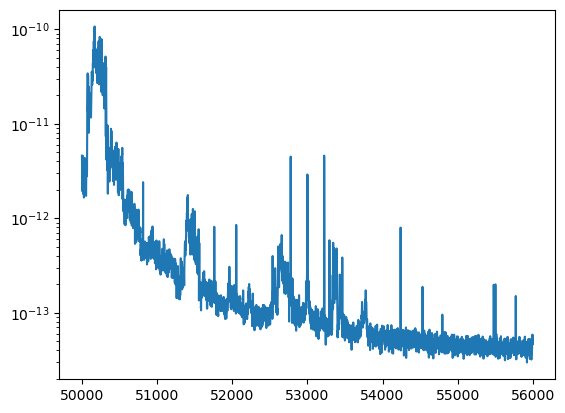

In [3]:
cal = 10**(-15)*0.75 # Matching to Yu-Han's calibration
lb = 50000
ub = 56000
plt.plot(PSD[0][lb:ub], np.sqrt(PSD[1][lb:ub]*cal))
plt.yscale('log')

In [12]:
freqs = [5300]

path = r'D:\Lab Data\lorentz_force\sphere20250507\20250522\2.5 V\Background\tt'
files = np.linspace(0, 719, 720, dtype = int)
end = '.hdf5'
phases2 = np.zeros((len(freqs), len(files)*100))
amps2 = np.zeros((len(freqs), len(files)*100))
cfs2 = np.zeros((len(freqs), len(files)*100))
for n, file in enumerate(files):
    filename = path + str(file) + end
    data, attrs = au.load_data_lf(filename)
    for i in range(100):
        drive = data['channel_f'][i*10**5:(i+1)*10**5]
        drive2 = data['channel_d'][i*10**5:(i+1)*10**5]
        fft_drive = np.fft.rfft(drive)
        fft_drive2 = np.fft.rfft(drive2)
        for m, freq in enumerate(freqs):
            phase = np.unwrap([-np.pi, cmath.phase(fft_drive[freq])-cmath.phase(fft_drive2[freq])])
            amp = np.abs(fft_drive2[freq])/np.abs(fft_drive[freq])
            cf = np.argmax(np.abs(fft_drive2[4000:6000])) + 4000
            amps2[m, 100*n+i] = amp
            phases2[m, 100*n+i] = phase[1]
            cfs2[m, 100*n+i] = cf

In [20]:
data_dict = {'amps': amps2, 'phases': phases2, 'cfs': cfs2}
filename = r'C:\Users\thoma\Documents\SIMPLE\Data\Lab data\Lorentz force\Background250522.hdf5'
au.save_data_hdf5(filename, data_dict)

In [4]:
filename = r'C:\Users\thoma\Documents\SIMPLE\Data\Lab data\Lorentz force\Background250522.hdf5'
data = au.load_data_hdf52(filename)
amps2 = data['amps']
phases2 = data['phases']
cfs2 = data['cfs']

In [7]:
cal3 = 3*10**(-12)/np.mean(amps2[:10])

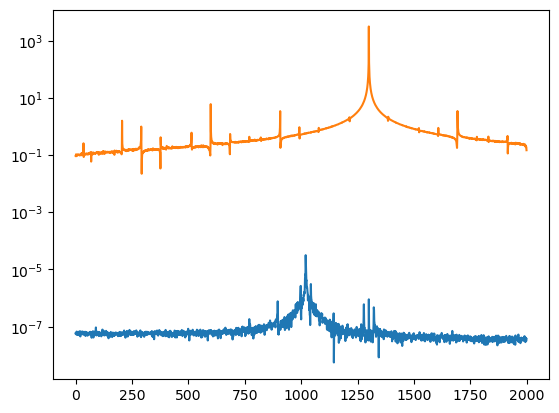

In [22]:
plt.plot(np.abs(fft_drive2[4000:6000])*np.sqrt(cal))
plt.plot(np.abs(fft_drive[4000:6000]))
plt.yscale('log')


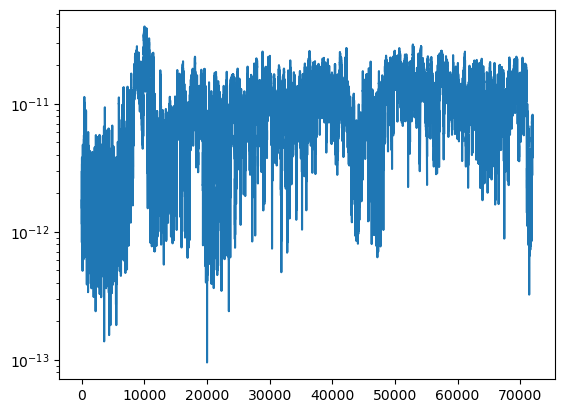

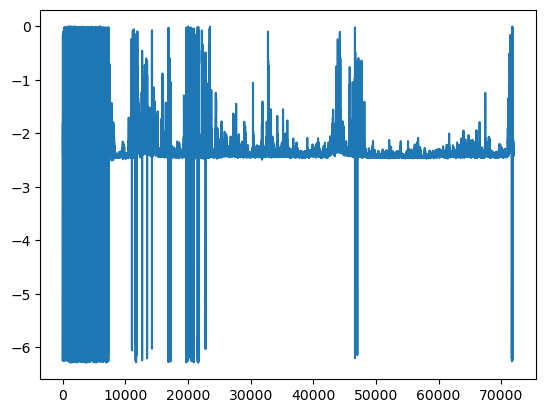

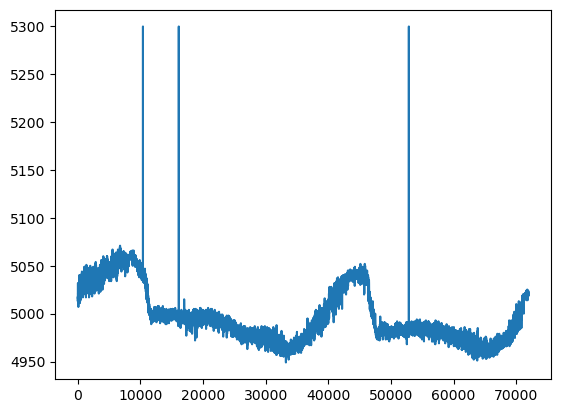

In [9]:
plt.plot(amps2[0]*cal3*np.sqrt(10))
plt.yscale('log')
plt.figure()
plt.plot(phases2[0])
plt.figure()
plt.plot(cfs2[0])